<a href="https://colab.research.google.com/github/KajetanFrackowiak/tensorflow_fundamentals/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural network and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front

#Get the data

The images we're working with are from the Food1 dataset.

However with modififed it to only use two classes pizza and steak.

In [25]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-20 14:42:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.207, 173.194.216.207, 108.177.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   104MB/s    in 1.0s    

2023-12-20 14:42:22 (104 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data

In [4]:
!ls pizza_steak

test  train


In [5]:
!ls pizza_steak/train/

pizza  steak


In [6]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [7]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directiories and {len(filenames)} images in '{dirpath}")

There are 2 directiories and 0 images in 'pizza_steak
There are 2 directiories and 0 images in 'pizza_steak/test
There are 0 directiories and 250 images in 'pizza_steak/test/steak
There are 0 directiories and 250 images in 'pizza_steak/test/pizza
There are 2 directiories and 0 images in 'pizza_steak/train
There are 0 directiories and 750 images in 'pizza_steak/train/steak
There are 0 directiories and 750 images in 'pizza_steak/train/pizza


In [8]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 20 08:37 .
drwxr-xr-x 1 root root 4096 Dec 20 08:37 ..
drwxr-xr-x 4 root root 4096 Dec 20 08:37 test
drwxr-xr-x 4 root root 4096 Dec 20 08:37 train


In [9]:
# Another way to find our how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmitically

In [10]:
# Get the classnames programmatically

In [11]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class_names from the subdirect
print(class_names)

['pizza' 'steak']


In [37]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setu the target directory
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")  # Show the shape of the image

  return img

['172936.jpg']
Image shape: (512, 382, 3)


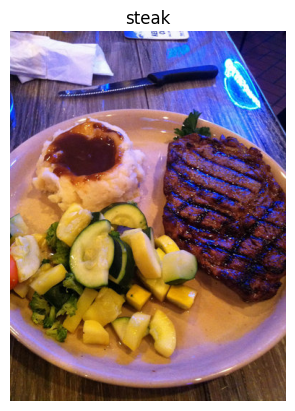

In [13]:
# View a random image from the training dataset
img =  view_random_image(target_dir="pizza_steak/train/",
                         target_class="steak")

In [14]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[150, 128, 164],
        [136, 116, 151],
        [114,  94, 131],
        ...,
        [ 10,   8,  45],
        [  3,   2,  33],
        [  3,   3,  31]],

       [[188, 168, 203],
        [187, 167, 202],
        [183, 163, 200],
        ...,
        [ 10,   6,  41],
        [  5,   2,  33],
        [  7,   4,  33]],

       [[188, 168, 203],
        [192, 172, 209],
        [196, 175, 214],
        ...,
        [  7,   4,  35],
        [  5,   2,  31],
        [  9,   6,  35]],

       ...,

       [[ 56,  49,  23],
        [ 47,  37,  12],
        [ 54,  40,  14],
        ...,
        [111,  83,  59],
        [114,  84,  60],
        [102,  70,  47]],

       [[ 50,  43,  24],
        [ 46,  38,  17],
        [ 53,  38,  17],
        ...,
        [112,  81,  60],
        [113,  81,  60],
        [ 97,  65,  44]],

       [[ 49,  43,  27],
        [ 51,  42,  25],
        [ 55,  40,  21],
        ...,
        [111,  80,  6

In [15]:
# View the image shape
img.shape

(512, 382, 3)

As we've discussed before, many machine learning models, including neural network prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred as **normalzie**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value)

## An end-to-end example

Let's build a convolutional neural network to find patterns in our imags, more specifically we a need way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scalling/normalziation)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directory
train_dir = "/content/pizza_steak/test"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


TypeError: ignored

If the above cell is taking longer than 10 sec per epoch, make sure you're using a GPU

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

Number of Parameters=(Number of Input Units Number of Output Units)+Number of Output Units

## Using the name model as before

In [25]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 4, activation="relu"),
    tf.keras.layers.Conv2D(10, 4, activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
16/16 [==============================] - 71s 4s/step - loss: 1.2847 - accuracy: 0.6320 - val_loss: 0.5750 - val_accuracy: 0.6800
Epoch 2/5
16/16 [==============================] - 69s 4s/step - loss: 0.5092 - accuracy: 0.7980 - val_loss: 0.3800 - val_accuracy: 0.8440
Epoch 3/5
16/16 [==============================] - 62s 4s/step - loss: 0.3555 - accuracy: 0.8420 - val_loss: 0.2706 - val_accuracy: 0.8980
Epoch 4/5
16/16 [==============================] - 71s 5s/step - loss: 0.2726 - accuracy: 0.8900 - val_loss: 0.2298 - val_accuracy: 0.9080
Epoch 5/5
16/16 [==============================] - 67s 4s/step - loss: 0.1730 - accuracy: 0.9520 - val_loss: 0.0958 - val_accuracy: 0.9860


In [35]:
model_2.save("model_2_cnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 219, 219, 10)      1610      
                                                                 
 conv2d_9 (Conv2D)           (None, 216, 216, 10)      1610      
                                                                 
 flatten_6 (Flatten)         (None, 466560)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 466561    
                                                                 
Total params: 470061 (1.79 MB)
Trainable params: 470061 (1.79 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Number of Parameters=(Filter Width×Filter Height×Number of Input Channels+1)×Number of Filters

In [33]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
16/16 [==============================] - 11s 636ms/step - loss: 10.0575 - accuracy: 0.5340 - val_loss: 1.0348 - val_accuracy: 0.7280
Epoch 2/5
16/16 [==============================] - 8s 520ms/step - loss: 1.8533 - accuracy: 0.6980 - val_loss: 0.8135 - val_accuracy: 0.7660
Epoch 3/5
16/16 [==============================] - 9s 557ms/step - loss: 0.9628 - accuracy: 0.6960 - val_loss: 0.5994 - val_accuracy: 0.7940
Epoch 4/5
16/16 [==============================] - 10s 619ms/step - loss: 1.4565 - accuracy: 0.6960 - val_loss: 2.5573 - val_accuracy: 0.5780
Epoch 5/5
16/16 [==============================] - 8s 517ms/step - loss: 1.2554 - accuracy: 0.7260 - val_loss: 1.7510 - val_accuracy: 0.6560


In [34]:
model_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_23 (Dense)            (None, 100)               15052900  
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification

1. Become one with the data

['2796102.jpg']
Image shape: (384, 512, 3)
['2831983.jpg']
Image shape: (512, 512, 3)


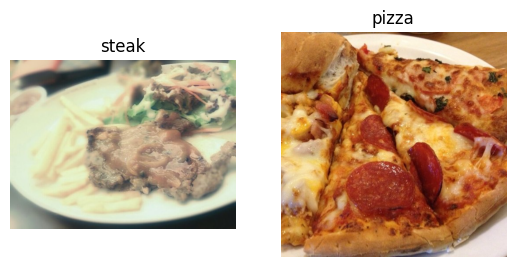

In [42]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [26]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**

A batch is a small subset of data. Rather then look at all 10,000 images at one time.

1. 10,000 images (or more) might not fit into the memory your processor (GPU).
2. Trying to learn the patterns in 10,00 images in one hit could result in the model not being able to learn very well.

In [27]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [29]:
# Get a sample of a training daa batch
images, labels = train_data.next()  # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [30]:
# How many batches are there?
len(train_data)

47

In [31]:
# Get the first two images
images[0], images[0].shape

(array([[[0.03137255, 0.03137255, 0.03921569],
         [0.02745098, 0.02745098, 0.03529412],
         [0.02745098, 0.02745098, 0.03529412],
         ...,
         [0.49411768, 0.45098042, 0.48235297],
         [0.49411768, 0.45098042, 0.48235297],
         [0.5058824 , 0.46274513, 0.49411768]],
 
        [[0.02745098, 0.02745098, 0.03529412],
         [0.03137255, 0.03137255, 0.03921569],
         [0.03137255, 0.03137255, 0.03921569],
         ...,
         [0.5019608 , 0.45882356, 0.4901961 ],
         [0.49803925, 0.454902  , 0.48627454],
         [0.49411768, 0.45098042, 0.48235297]],
 
        [[0.01960784, 0.01960784, 0.02745098],
         [0.02352941, 0.02352941, 0.03137255],
         [0.02352941, 0.02352941, 0.03137255],
         ...,
         [0.5137255 , 0.47058827, 0.5019608 ],
         [0.5294118 , 0.48627454, 0.5176471 ],
         [0.52156866, 0.4784314 , 0.50980395]],
 
        ...,
 
        [[0.7960785 , 0.7490196 , 0.7568628 ],
         [0.8078432 , 0.7607844 , 0.76862

In [32]:
# View the first batch of labels
labels, labels.shape

(array([1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0.],
       dtype=float32),
 (32,))

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when begin experimenting, you try to beat the baseline

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create a model (this will be our baseline, a layer convolution neural network)
model_4 = Sequential([
    Conv2D(filters=10,  # filter is the number of sliding winodws going across an input (higher = more complex model)
           kernel_size=3,  # the size of the sliding windows going across an input
           strides=1,  # the size of the step the sliding window takes across an input
           padding="valid",  #  if "valid", then output shape gets compressed, if "same", then output shape is same as input shape
           activation="relu",
           input_shape=(224, 224, 3)),  # Input layer (specify input s)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

**Practice:** Understand what's going on in Conv2D layer by going through the CNN explainer website for 10-20 minutes

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [36]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_12 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_3 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. fit the model

In [37]:
# Check the lengths of training and test data generatos
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data,  # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 135s 3s/step - loss: 0.7708 - accuracy: 0.5780 - val_loss: 0.6597 - val_accuracy: 0.5780
Epoch 2/5
47/47 [==============================] - 132s 3s/step - loss: 0.5866 - accuracy: 0.7153 - val_loss: 0.5895 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 121s 3s/step - loss: 0.4532 - accuracy: 0.8167 - val_loss: 0.4520 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 125s 3s/step - loss: 0.3150 - accuracy: 0.8833 - val_loss: 0.4119 - val_accuracy: 0.8160
Epoch 5/5
47/47 [==============================] - 129s 3s/step - loss: 0.1573 - accuracy: 0.9527 - val_loss: 0.4856 - val_accuracy: 0.7700


In [39]:
model_1.evaluate(test_data)

16/16 [==============================] - 11s 600ms/step - loss: 0.6959 - accuracy: 0.4720


[0.695945680141449, 0.47200000286102295]

In [40]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### 5. Evaluating our model
It looks like our model is learning something.

<Axes: >

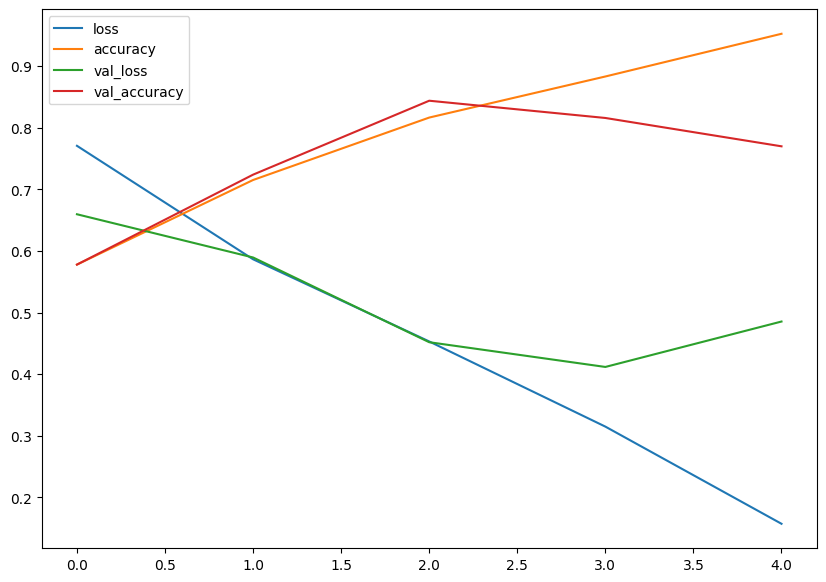

In [41]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [49]:
import matplotlib.pyplot as plt

In [50]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

When a model's **validation loss starts to increase** it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

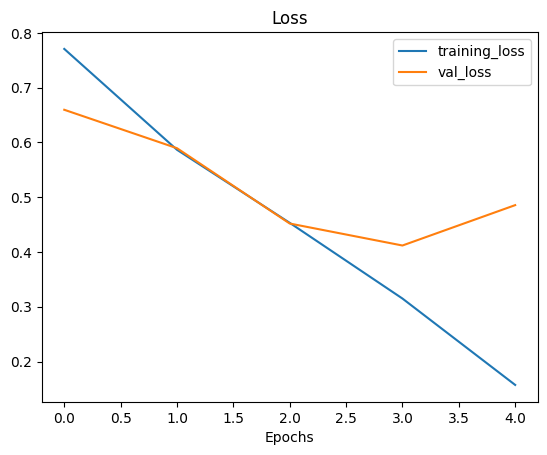

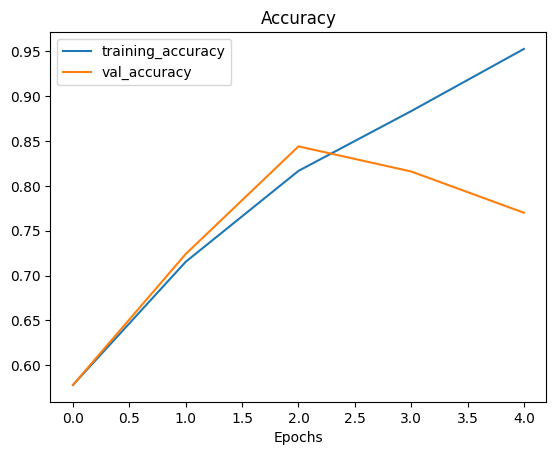

In [51]:
# Check the
plot_loss_curves(history_4)